# **Series de Tiempo COVID19 - Marcos Damián Pool Canul**

In [3]:
# %pip install skforecast
# %pip install prophet
# %pip install statsmodels
# %pip install pmdarima

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np

Importing plotly failed. Interactive plots will not work.


In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.gofplots import qqplot
import itertools
import statsmodels.api as sm

In [6]:
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_percentage_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<font color="red">Actividad</font>

* Accede al tablero del CONACyT sobre los contagios por COVID en México: https://datos.covid-19.conacyt.mx/
* Descarga los datos de contagios diarios (panel de la izquierda)
* Construye la serie de tiempo de los casos a nivel nacional.
* Construye la serie de tiempo de los casos en Quintana Roo.

*   Describe las características de las series de tiempo obtenidas.
*   Entregable: Libreta de Colab

## **Lectura de datos**

In [8]:
df = pd.read_csv("../files/Casos_Diarios_Estado_Nacional_Confirmados_20230625.csv", encoding="unicode_escape")

In [12]:
df.head(32)

,cve_ent,poblacion,nombre,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,...,15-06-2023,16-06-2023,17-06-2023,18-06-2023,19-06-2023,20-06-2023,21-06-2023,22-06-2023,23-06-2023,24-06-2023
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,2,3,0,0,4,3,2,5,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,23,22,0,2,25,27,24,19,6,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,6,3,0,0,5,2,6,2,3,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,8,7,0,7,2,3,2,0,7,0
4,7,5730367,CHIAPAS,0,0,0,1,0,0,0,...,6,5,0,0,7,9,8,4,3,0
5,8,3801487,CHIHUAHUA,0,0,0,0,0,0,0,...,6,16,0,0,11,9,7,8,2,0
6,9,9018645,DISTRITO FEDERAL,0,2,0,0,0,0,1,...,69,54,17,23,94,74,77,79,37,4
7,5,3218720,COAHUILA,0,0,1,0,0,0,1,...,4,3,0,1,6,8,4,5,2,0
8,6,785153,COLIMA,0,0,0,0,0,0,0,...,5,4,0,1,13,7,17,6,8,0
9,10,1868996,DURANGO,0,0,0,0,0,0,0,...,4,5,3,1,2,1,7,5,3,0


In [13]:
df.shape

(33, 1218)

In [15]:
2436/33

73.81818181818181

In [22]:
print(df.columns)

Index(['cve_ent', 'poblacion', 'nombre', '26-02-2020', '27-02-2020',
       '28-02-2020', '29-02-2020', '01-03-2020', '02-03-2020', '03-03-2020',
       ...
       '15-06-2023', '16-06-2023', '17-06-2023', '18-06-2023', '19-06-2023',
       '20-06-2023', '21-06-2023', '22-06-2023', '23-06-2023', '24-06-2023'],
      dtype='object', length=1218)


## **Series de tiempo**

### **Nivel Nacional**

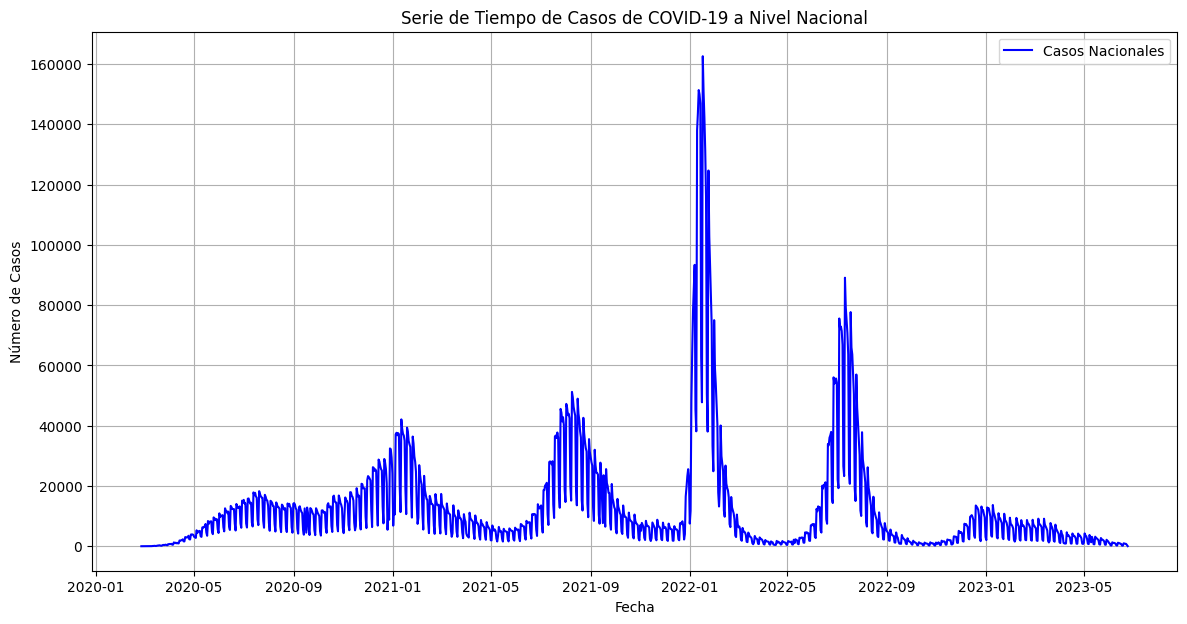

In [18]:
import matplotlib.pyplot as plt

# Sumar todos los casos diarios por fecha para obtener la serie de tiempo nacional
national_cases = df.iloc[:, 3:].sum()

# Convertir la serie de tiempo nacional a un DataFrame para mejor manejo
national_cases_df = pd.DataFrame(national_cases, columns=["Casos"])
national_cases_df.index = pd.to_datetime(
    national_cases_df.index, format='%d-%m-%Y')

# Plotting the national cases time series
plt.figure(figsize=(14, 7))
plt.plot(national_cases_df.index,
         national_cases_df["Casos"], label='Casos Nacionales', color='blue')
plt.title('Serie de Tiempo de Casos de COVID-19 a Nivel Nacional')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.legend()
plt.show()

### **Quintana Roo**

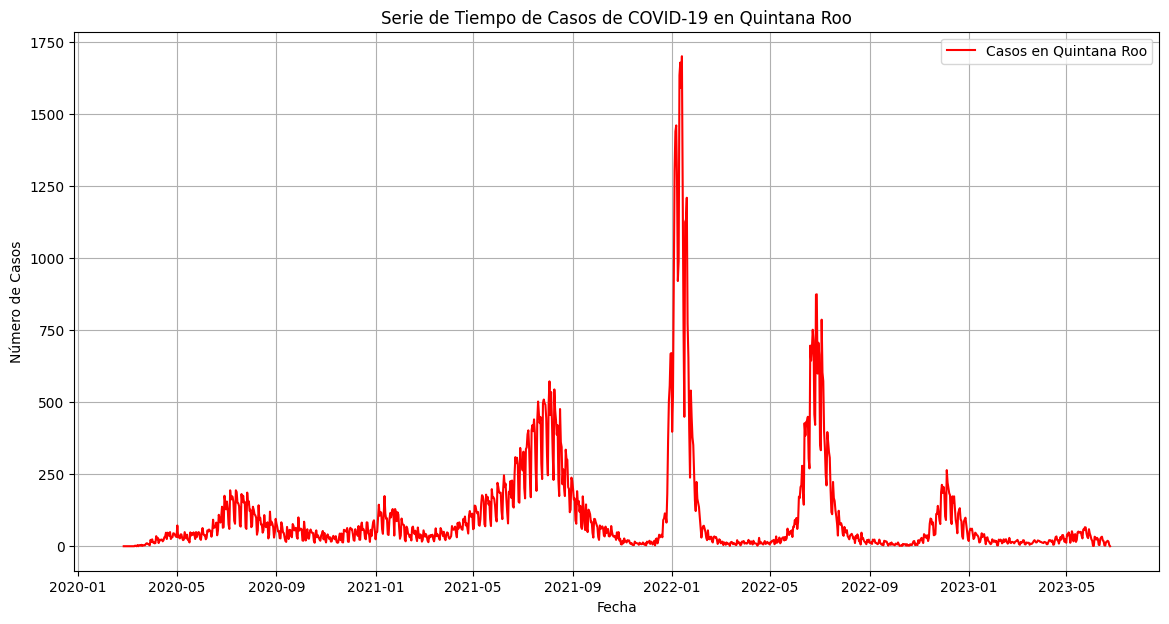

In [21]:
# Extraer los datos para Quintana Roo
quintana_roo_cases = df[df['nombre'].str.contains(
    "QUINTANA ROO", case=False, na=False)].iloc[:, 3:].transpose()

# Convertir la serie de tiempo de Quintana Roo a un DataFrame para mejor manejo
quintana_roo_cases_df = quintana_roo_cases
quintana_roo_cases_df.columns = ["Casos"]
quintana_roo_cases_df.index = pd.to_datetime(
    quintana_roo_cases_df.index, format='%d-%m-%Y')

# Plotting the Quintana Roo cases time series
plt.figure(figsize=(14, 7))
plt.plot(quintana_roo_cases_df.index,
         quintana_roo_cases_df["Casos"], label='Casos en Quintana Roo', color='red')
plt.title('Serie de Tiempo de Casos de COVID-19 en Quintana Roo')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.legend()
plt.show()

## **Exploracion de datos**

### **Nivel Nacional**

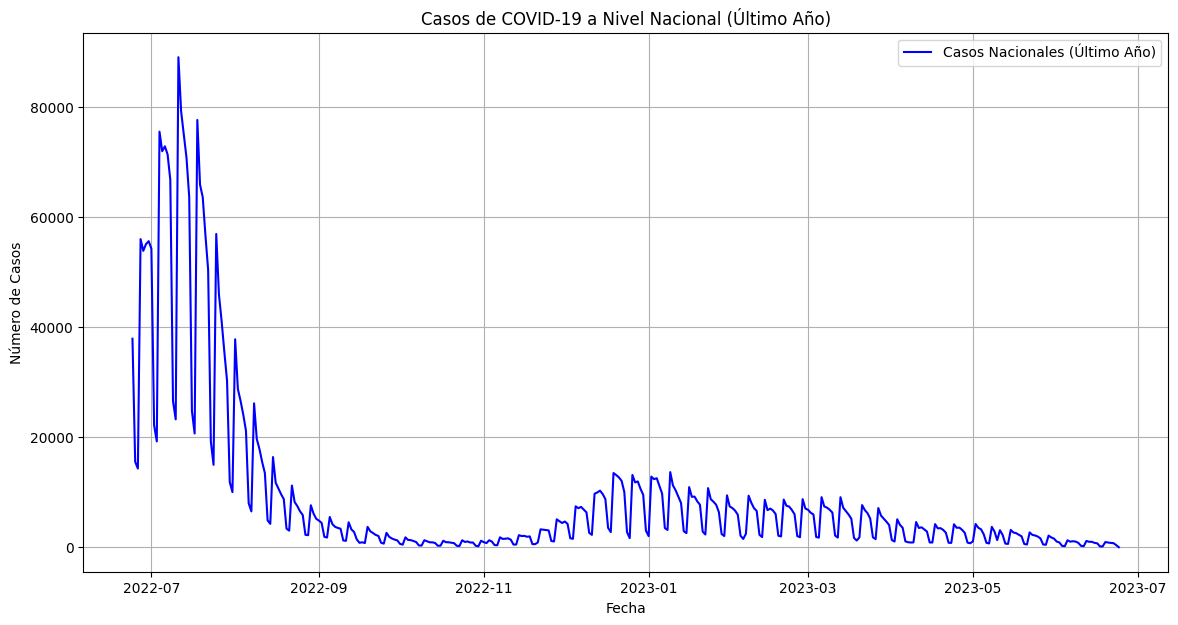

(              Casos
 count    366.000000
 mean    8959.540984
 std    15729.658177
 min       30.000000
 25%     1294.500000
 50%     3275.000000
 75%     8286.500000
 max    89100.000000,
 <Figure size 1400x700 with 1 Axes>,
 Text(0.5, 1.0, 'Casos de COVID-19 a Nivel Nacional (Último Año)'),
 Text(0.5, 24.000000000000007, 'Fecha'),
 Text(23.999999999999986, 0.5, 'Número de Casos'),
 None,
 None)

In [25]:
# Extraer los datos del último año a nivel nacional para un análisis más detallado
last_year_data = national_cases_df.loc['2022-06-24':'2023-06-24']

# Resumen estadístico de los casos durante el último año
last_year_summary = last_year_data.describe()

# Mostrar el resumen estadístico y un gráfico de la serie de tiempo para el último año
last_year_summary, plt.figure(figsize=(14, 7)), plt.plot(last_year_data.index, last_year_data["Casos"], label='Casos Nacionales (Último Año)', color='blue'), plt.title(
    'Casos de COVID-19 a Nivel Nacional (Último Año)'), plt.xlabel('Fecha'), plt.ylabel('Número de Casos'), plt.grid(True), plt.legend(), plt.show()

Durante el último año, a nivel nacional, los datos de los casos de COVID-19 presentan las siguientes características estadísticas:

- **Número total de observaciones (días):** 366
- **Promedio diario de casos:** 8,959.54
- **Desviación estándar:** 15,729.66, indicando una alta variabilidad en el número de casos diarios.
- **Mínimo de casos reportados en un día:** 30
- **Máximo de casos reportados en un día:** 89,100
- **Mediana (50%):** 3,275 casos, lo que refleja que la mitad de los días tuvieron menos de 3,275 casos y la otra mitad más.
- **25% de los días reportaron hasta:** 1,294.5 casos.
- **75% de los días reportaron hasta:** 8,286.5 casos.

El gráfico muestra claramente la evolución de los casos de COVID-19 durante el último año, con períodos de aumento significativo en el número de casos, lo que podría corresponder a olas de infecciones o variaciones en las políticas de salud y respuesta pública. Esta visión gráfica permite identificar tendencias, picos y posibles patrones que pueden ser cruciales para la planificación de la salud pública y las estrategias de respuesta.

### **Quintana Roo**

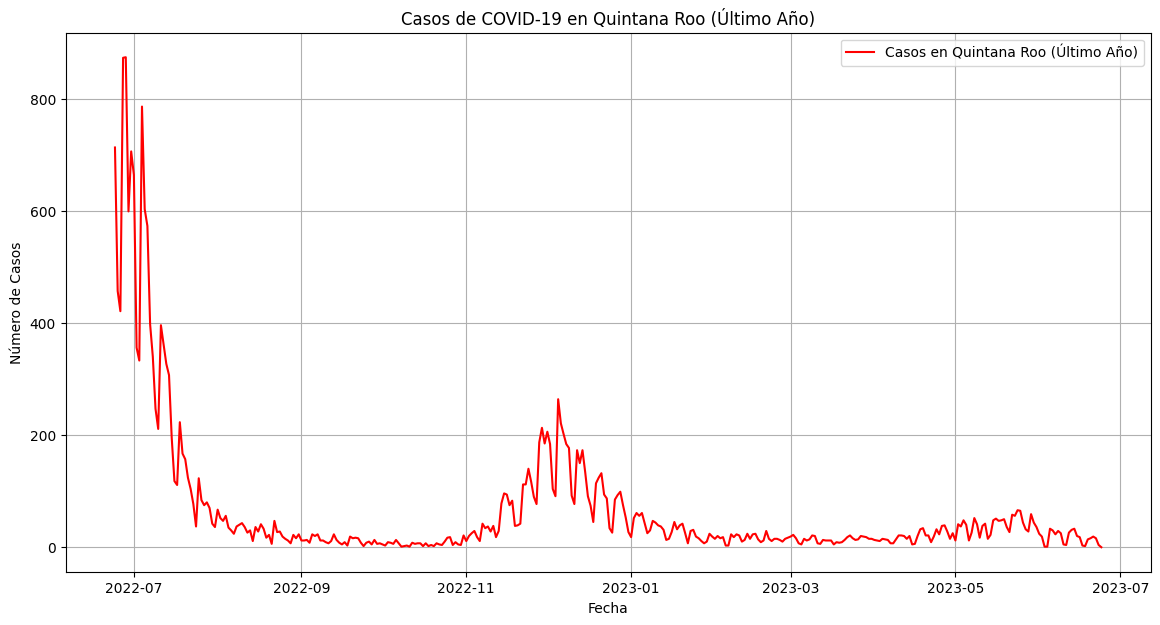

(            Casos
 count  366.000000
 mean    64.726776
 std    126.081738
 min      0.000000
 25%     12.250000
 50%     23.000000
 75%     48.000000
 max    874.000000,
 <Figure size 1400x700 with 1 Axes>,
 Text(0.5, 1.0, 'Casos de COVID-19 en Quintana Roo (Último Año)'),
 Text(0.5, 24.000000000000007, 'Fecha'),
 Text(24.000000000000007, 0.5, 'Número de Casos'),
 None,
 None)

In [26]:
# Extraer los datos del último año para Quintana Roo para un análisis más detallado
last_year_quintana_roo = quintana_roo_cases_df.loc['2022-06-24':'2023-06-24']

# Resumen estadístico de los casos durante el último año en Quintana Roo
last_year_quintana_roo_summary = last_year_quintana_roo.describe()

# Mostrar el resumen estadístico y un gráfico de la serie de tiempo para el último año en Quintana Roo
last_year_quintana_roo_summary, plt.figure(figsize=(14, 7)), plt.plot(last_year_quintana_roo.index, last_year_quintana_roo["Casos"], label='Casos en Quintana Roo (Último Año)', color='red'), plt.title(
    'Casos de COVID-19 en Quintana Roo (Último Año)'), plt.xlabel('Fecha'), plt.ylabel('Número de Casos'), plt.grid(True), plt.legend(), plt.show()

Durante el último año, la serie de tiempo para los casos de COVID-19 en Quintana Roo muestra las siguientes características estadísticas:

- **Número total de observaciones (días):** 366
- **Promedio diario de casos:** 64.73
- **Desviación estándar:** 126.08, indicando variabilidad considerable en el número de casos diarios.
- **Mínimo de casos reportados en un día:** 0
- **Máximo de casos reportados en un día:** 874
- **Mediana (50%):** 23 casos, lo que indica que la mitad de los días tuvieron menos de 23 casos y la otra mitad más.
- **25% de los días reportaron hasta:** 12.25 casos.
- **75% de los días reportaron hasta:** 48 casos.

El gráfico ilustra la evolución de los casos de COVID-19 en Quintana Roo durante el último año, destacando periodos de aumento y disminución en el número de casos. La variabilidad y los picos pueden estar relacionados con factores locales como el turismo, eventos masivos, o cambios en las políticas de salud pública. Esta información es vital para entender la dinámica de la pandemia en el estado y para tomar decisiones informadas en la gestión de la salud pública local.

## **Caracteristicas**

### **Nivel Nacional**

La serie de tiempo de los casos de COVID-19 a nivel nacional en México, como se visualiza en la gráfica, presenta varias características clave:

1. **Tendencia**: La serie muestra múltiples picos y valles, indicativos de las diferentes olas de infecciones que han ocurrido a lo largo de la pandemia. Estos picos pueden corresponder a brotes significativos, relajación de medidas de distanciamiento social, o a la aparición de nuevas variantes del virus.

2. **Estacionalidad**: Aunque los datos cubren más de tres años y es difícil determinar patrones estacionales claros sin un análisis más profundo, podríamos suponer que hay influencias estacionales en la transmisión del virus, como se ha observado en otras regiones del mundo. Esto podría ser más notable durante los meses de invierno o periodos específicos donde las condiciones climáticas o las actividades sociales incrementan la transmisión.

3. **Ciclicidad**: Además de la estacionalidad, las políticas de salud pública como el inicio y el fin de confinamientos o la implementación de campañas de vacunación pueden haber creado ciclos evidentes en la transmisión del virus, reflejados en los aumentos y disminuciones de los casos.

4. **Volatilidad**: La serie muestra una alta volatilidad, con rápidos aumentos en el número de casos seguidos por declives igualmente rápidos. Esto puede ser un reflejo de la naturaleza altamente infecciosa del virus y de la reactividad de las políticas de salud pública.

5. **Irregularidades**: Existen algunas irregularidades, como días con picos anormalmente altos o bajos que podrían estar asociados con retrasos en la notificación de los casos o cambios en las metodologías de reporte.

6. **Tendencia a largo plazo**: A pesar de los picos, es crucial observar si la tendencia general muestra una disminución, lo cual sería indicativo de una mejora en el control de la pandemia, o si los casos siguen siendo elevados, sugiriendo desafíos continuos en la respuesta a la salud pública.

### **Quintana Roo**

La serie de tiempo de los casos de COVID-19 en Quintana Roo, al igual que la serie nacional, revela aspectos importantes sobre la evolución de la pandemia en este estado específico:

1. **Tendencia**: Similar a la serie nacional, la serie de tiempo para Quintana Roo muestra varios picos que reflejan las oleadas de infecciones. Estos picos son claves para entender los momentos en que la transmisión del virus fue más intensa, posiblemente influenciados por el turismo dado que Quintana Roo es un destino turístico importante.

2. **Volatilidad**: La serie también presenta volatilidad, con cambios abruptos en el número de casos reportados. Esto podría reflejar variaciones en la transmisión del virus, así como en la capacidad de respuesta y reporte del sistema de salud local.

3. **Estacionalidad**: Dada la importancia del turismo en Quintana Roo, podría haber una estacionalidad marcada en la transmisión del virus, con aumentos durante las temporadas altas de visitantes, aunque esto requeriría un análisis más detallado para confirmarlo.

4. **Ciclicidad**: Las políticas locales de salud y las medidas preventivas tomadas durante ciertos periodos también pueden haber influido en la serie de tiempo, creando ciclos de aumento y disminución en el número de casos, como confinamientos o campañas intensivas de salud pública.

5. **Irregularidades**: Al igual que en la serie nacional, pueden observarse irregularidades en los datos que podrían deberse a retrasos o ajustes en la notificación de casos, o cambios en la capacidad de prueba del estado.

6. **Tendencia a largo plazo**: Es crucial observar la tendencia a largo plazo para determinar si los esfuerzos para controlar la pandemia están siendo efectivos, si los casos están disminuyendo con el tiempo, o si persisten desafíos significativos en el manejo de la salud pública.

## **Conclusiones**

Las series de tiempo de casos de COVID-19 tanto a nivel nacional en México como en el estado de Quintana Roo ofrecen una visión detallada y cuantificada de cómo la pandemia ha evolucionado en diferentes escalas geográficas durante el último año.

### Conclusión Nacional:
A nivel nacional, los datos muestran una considerable variabilidad en el número de casos diarios, con un promedio alto y picos significativos que pueden alcanzar hasta 89,100 casos en un solo día. La desviación estándar es alta, reflejando fluctuaciones significativas en los datos. Estos picos pueden estar relacionados con brotes específicos, la introducción de nuevas variantes del virus, cambios en las políticas de salud pública, o incrementos en la capacidad y disponibilidad de pruebas. La presencia de estos altos y bajos ilustra los desafíos constantes que enfrenta el sistema de salud para controlar y mitigar la propagación del virus a nivel nacional.

### Conclusión Quintana Roo:
En Quintana Roo, el número promedio diario de casos es considerablemente más bajo que a nivel nacional, pero aún muestra una variabilidad significativa, con picos que pueden ser consecuencia de factores locales como el turismo y eventos masivos. La máxima cantidad de casos reportados en un solo día fue de 874, lo cual es sustancialmente menor que a nivel nacional, pero sigue siendo significativo para la capacidad de manejo local. La volatilidad en los casos refleja los desafíos específicos que enfrenta el estado, que pueden incluir la gestión de la afluencia de turistas, que potencialmente eleva el riesgo de brotes.

### Implicaciones:
Las diferencias y similitudes en las series de tiempo de ambos niveles ilustran cómo los brotes locales pueden contribuir a la situación nacional y cómo las medidas específicas en áreas con alta interacción social y turismo son críticas. Para ambos niveles, la gestión eficaz de la salud pública requiere una vigilancia continua, la capacidad de adaptarse rápidamente a nuevas informaciones, y la implementación de estrategias de mitigación basadas en la evolución de los datos. Los picos ocasionales subrayan la importancia de la preparación para manejar aumentos repentinos en casos, y la necesidad de estrategias proactivas en salud pública para prevenir futuros brotes.